In [79]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',100)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
dataframe_all = pd.read_csv("https://d396qusza40orc.cloudfront.net/predmachlearn/pml-training.csv")

In [8]:
dataframe_all.to_csv('dimreduc.csv')

In [17]:
data = pd.read_csv('dimreduc.csv')
data.head()

,Unnamed: 0,Unnamed: 0.1,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,kurtosis_roll_belt,kurtosis_picth_belt,kurtosis_yaw_belt,skewness_roll_belt,skewness_roll_belt.1,skewness_yaw_belt,max_roll_belt,max_picth_belt,max_yaw_belt,min_roll_belt,min_pitch_belt,min_yaw_belt,amplitude_roll_belt,...,min_yaw_forearm,amplitude_roll_forearm,amplitude_pitch_forearm,amplitude_yaw_forearm,total_accel_forearm,var_accel_forearm,avg_roll_forearm,stddev_roll_forearm,var_roll_forearm,avg_pitch_forearm,stddev_pitch_forearm,var_pitch_forearm,avg_yaw_forearm,stddev_yaw_forearm,var_yaw_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,0,1,carlitos,1323084231,788290,05/12/2011 11:23,no,11,1.41,8.07,-94.4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,1,2,carlitos,1323084231,808298,05/12/2011 11:23,no,11,1.41,8.07,-94.4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
2,2,3,carlitos,1323084231,820366,05/12/2011 11:23,no,11,1.42,8.07,-94.4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A
3,3,4,carlitos,1323084232,120339,05/12/2011 11:23,no,12,1.48,8.05,-94.4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,-0.02,0.00,189,206,-214,-16,658.0,469.0,A
4,4,5,carlitos,1323084232,196328,05/12/2011 11:23,no,12,1.48,8.07,-94.4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0,A


In [20]:
num_rows = data.shape[0]
num_rows

19622

In [22]:
data.isnull().sum()

Unnamed: 0                     0
Unnamed: 0.1                   0
user_name                      0
raw_timestamp_part_1           0
raw_timestamp_part_2           0
cvtd_timestamp                 0
new_window                     0
num_window                     0
roll_belt                      0
pitch_belt                     0
yaw_belt                       0
total_accel_belt               0
kurtosis_roll_belt         19216
kurtosis_picth_belt        19216
kurtosis_yaw_belt          19216
skewness_roll_belt         19216
skewness_roll_belt.1       19216
skewness_yaw_belt          19216
max_roll_belt              19216
max_picth_belt             19216
max_yaw_belt               19216
min_roll_belt              19216
min_pitch_belt             19216
min_yaw_belt               19216
amplitude_roll_belt        19216
amplitude_pitch_belt       19216
amplitude_yaw_belt         19216
var_total_accel_belt       19216
avg_roll_belt              19216
stddev_roll_belt           19216
          

In [28]:
counter_nan = data.isnull().sum()
counter_without_nan = counter_nan[counter_nan == 0]
counter_without_nan.keys()

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'user_name', u'raw_timestamp_part_1',
       u'raw_timestamp_part_2', u'cvtd_timestamp', u'new_window',
       u'num_window', u'roll_belt', u'pitch_belt', u'yaw_belt',
       u'total_accel_belt', u'gyros_belt_x', u'gyros_belt_y', u'gyros_belt_z',
       u'accel_belt_x', u'accel_belt_y', u'accel_belt_z', u'magnet_belt_x',
       u'magnet_belt_y', u'magnet_belt_z', u'roll_arm', u'pitch_arm',
       u'yaw_arm', u'total_accel_arm', u'gyros_arm_x', u'gyros_arm_y',
       u'gyros_arm_z', u'accel_arm_x', u'accel_arm_y', u'accel_arm_z',
       u'magnet_arm_x', u'magnet_arm_y', u'magnet_arm_z', u'roll_dumbbell',
       u'pitch_dumbbell', u'yaw_dumbbell', u'total_accel_dumbbell',
       u'gyros_dumbbell_x', u'gyros_dumbbell_y', u'gyros_dumbbell_z',
       u'accel_dumbbell_x', u'accel_dumbbell_y', u'accel_dumbbell_z',
       u'magnet_dumbbell_x', u'magnet_dumbbell_y', u'magnet_dumbbell_z',
       u'roll_forearm', u'pitch_forearm', u'yaw_forearm',
       u't

In [33]:
data_all = data[counter_without_nan.keys()]
data_all = data_all.ix[:,7:]

In [37]:
data_all.head()

,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,magnet_belt_x,magnet_belt_y,magnet_belt_z,roll_arm,pitch_arm,yaw_arm,total_accel_arm,gyros_arm_x,gyros_arm_y,gyros_arm_z,accel_arm_x,accel_arm_y,accel_arm_z,magnet_arm_x,magnet_arm_y,magnet_arm_z,roll_dumbbell,pitch_dumbbell,yaw_dumbbell,total_accel_dumbbell,gyros_dumbbell_x,gyros_dumbbell_y,gyros_dumbbell_z,accel_dumbbell_x,accel_dumbbell_y,accel_dumbbell_z,magnet_dumbbell_x,magnet_dumbbell_y,magnet_dumbbell_z,roll_forearm,pitch_forearm,yaw_forearm,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,11,1.41,8.07,-94.4,3,0.00,0.00,-0.02,-21,4,22,-3,599,-313,-128.0,22.5,-161.0,34,0.00,0.00,-0.02,-288,109,-123,-368,337,516,13.052175,-70.494004,-84.873939,37,0.0,-0.02,0.00,-234,47,-271,-559,293,-65.0,28.4,-63.9,-153.0,36,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,11,1.41,8.07,-94.4,3,0.02,0.00,-0.02,-22,4,22,-7,608,-311,-128.0,22.5,-161.0,34,0.02,-0.02,-0.02,-290,110,-125,-369,337,513,13.130740,-70.637505,-84.710647,37,0.0,-0.02,0.00,-233,47,-269,-555,296,-64.0,28.3,-63.9,-153.0,36,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
2,11,1.42,8.07,-94.4,3,0.00,0.00,-0.02,-20,5,23,-2,600,-305,-128.0,22.5,-161.0,34,0.02,-0.02,-0.02,-289,110,-126,-368,344,513,12.850750,-70.278120,-85.140781,37,0.0,-0.02,0.00,-232,46,-270,-561,298,-63.0,28.3,-63.9,-152.0,36,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A
3,12,1.48,8.05,-94.4,3,0.02,0.00,-0.03,-22,3,21,-6,604,-310,-128.0,22.1,-161.0,34,0.02,-0.03,0.02,-289,111,-123,-372,344,512,13.431200,-70.393795,-84.873626,37,0.0,-0.02,-0.02,-232,48,-269,-552,303,-60.0,28.1,-63.9,-152.0,36,0.02,-0.02,0.00,189,206,-214,-16,658.0,469.0,A
4,12,1.48,8.07,-94.4,3,0.02,0.02,-0.02,-21,2,24,-6,600,-302,-128.0,22.1,-161.0,34,0.00,-0.03,0.00,-289,111,-123,-374,337,506,13.378716,-70.428560,-84.853057,37,0.0,-0.02,0.00,-233,48,-270,-554,292,-68.0,28.0,-63.9,-152.0,36,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0,A


In [41]:
for i in data_all.columns:
    print i

num_window
roll_belt
pitch_belt
yaw_belt
total_accel_belt
gyros_belt_x
gyros_belt_y
gyros_belt_z
accel_belt_x
accel_belt_y
accel_belt_z
magnet_belt_x
magnet_belt_y
magnet_belt_z
roll_arm
pitch_arm
yaw_arm
total_accel_arm
gyros_arm_x
gyros_arm_y
gyros_arm_z
accel_arm_x
accel_arm_y
accel_arm_z
magnet_arm_x
magnet_arm_y
magnet_arm_z
roll_dumbbell
pitch_dumbbell
yaw_dumbbell
total_accel_dumbbell
gyros_dumbbell_x
gyros_dumbbell_y
gyros_dumbbell_z
accel_dumbbell_x
accel_dumbbell_y
accel_dumbbell_z
magnet_dumbbell_x
magnet_dumbbell_y
magnet_dumbbell_z
roll_forearm
pitch_forearm
yaw_forearm
total_accel_forearm
gyros_forearm_x
gyros_forearm_y
gyros_forearm_z
accel_forearm_x
accel_forearm_y
accel_forearm_z
magnet_forearm_x
magnet_forearm_y
magnet_forearm_z
classe


In [53]:
x = data_all.ix[:,:-1].values
std = StandardScaler()
x_std = std.fit_transform(x)

In [64]:
y = data_all.ix[:,-1].values
np.unique(y)

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

In [72]:
y = LabelEncoder().fit_transform(y)
y

array([0, 0, 0, ..., 4, 4, 4])

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size = 0.2, random_state = 0)

In [97]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
x_test_2d = tsne.fit_transform(x_test)

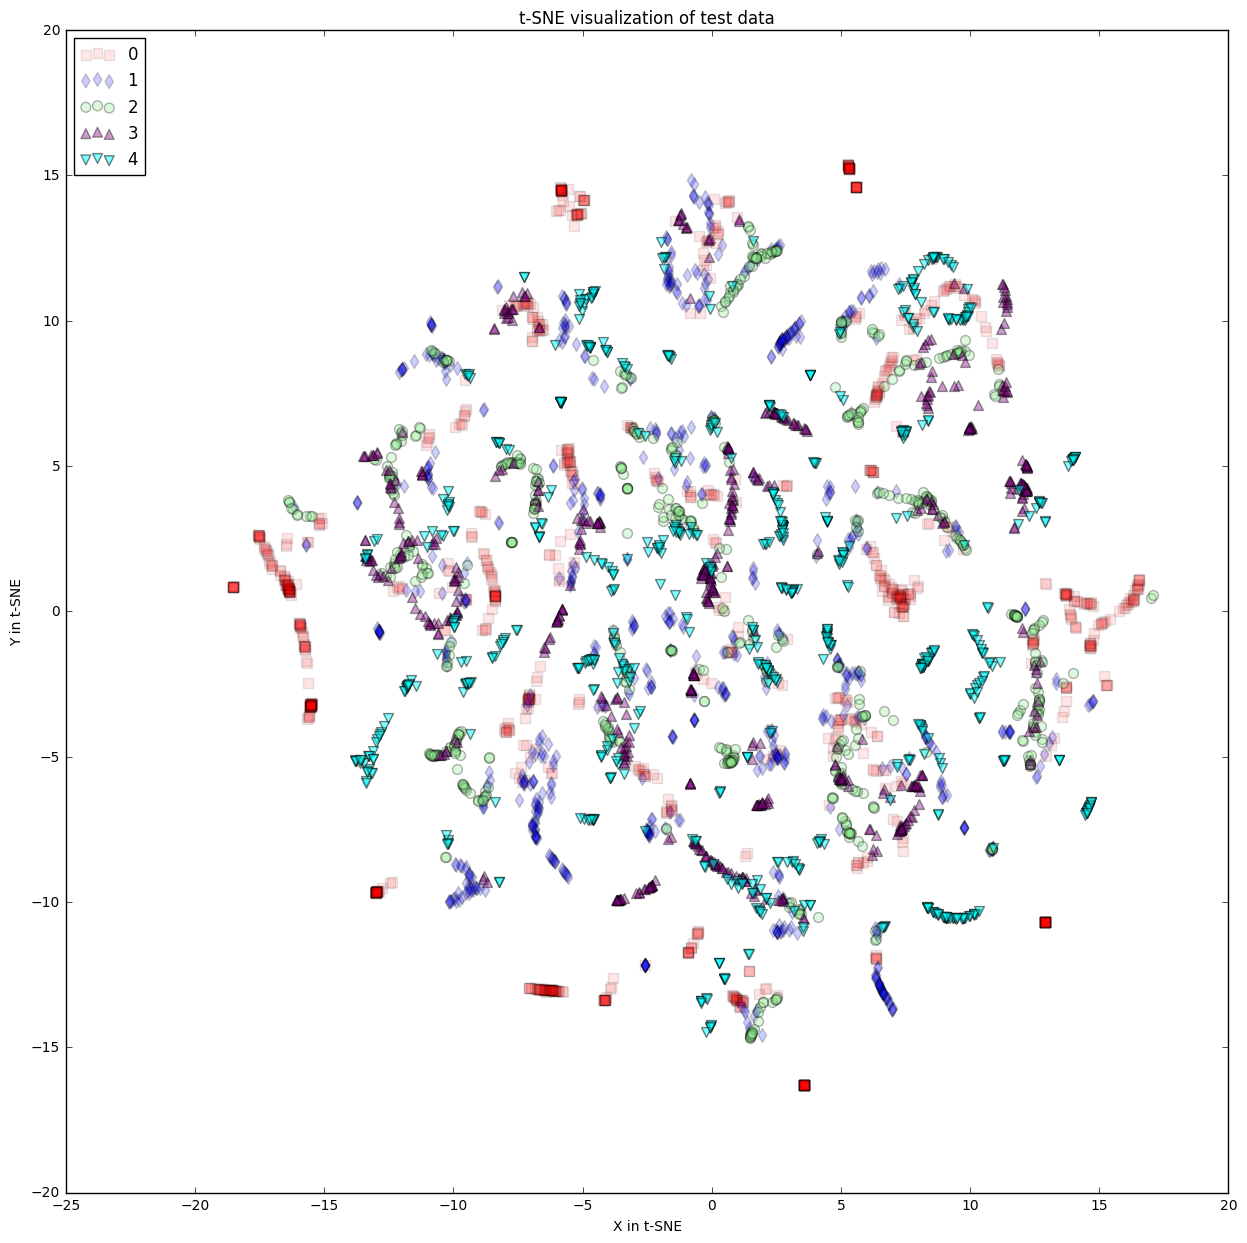

In [99]:
markers=('s', 'd', 'o', '^', 'v')
color_map = {0:'red', 1:'blue', 2:'lightgreen', 3:'purple', 4:'cyan'}
plt.figure(figsize=(15,15))
for idx, cl in enumerate(np.unique(y_test)):
    plt.scatter(x=x_test_2d[y_test==cl,0], y=x_test_2d[y_test==cl,1], c=color_map[idx], marker=markers[idx], label=cl, alpha=(idx+1)/10.0, s=50)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper left')
plt.title('t-SNE visualization of test data')
plt.show()

In [101]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [104]:
tsne_3d = TSNE(n_components=3,random_state=0)
x_test_3d = tsne_3d.fit_transform(x_test)

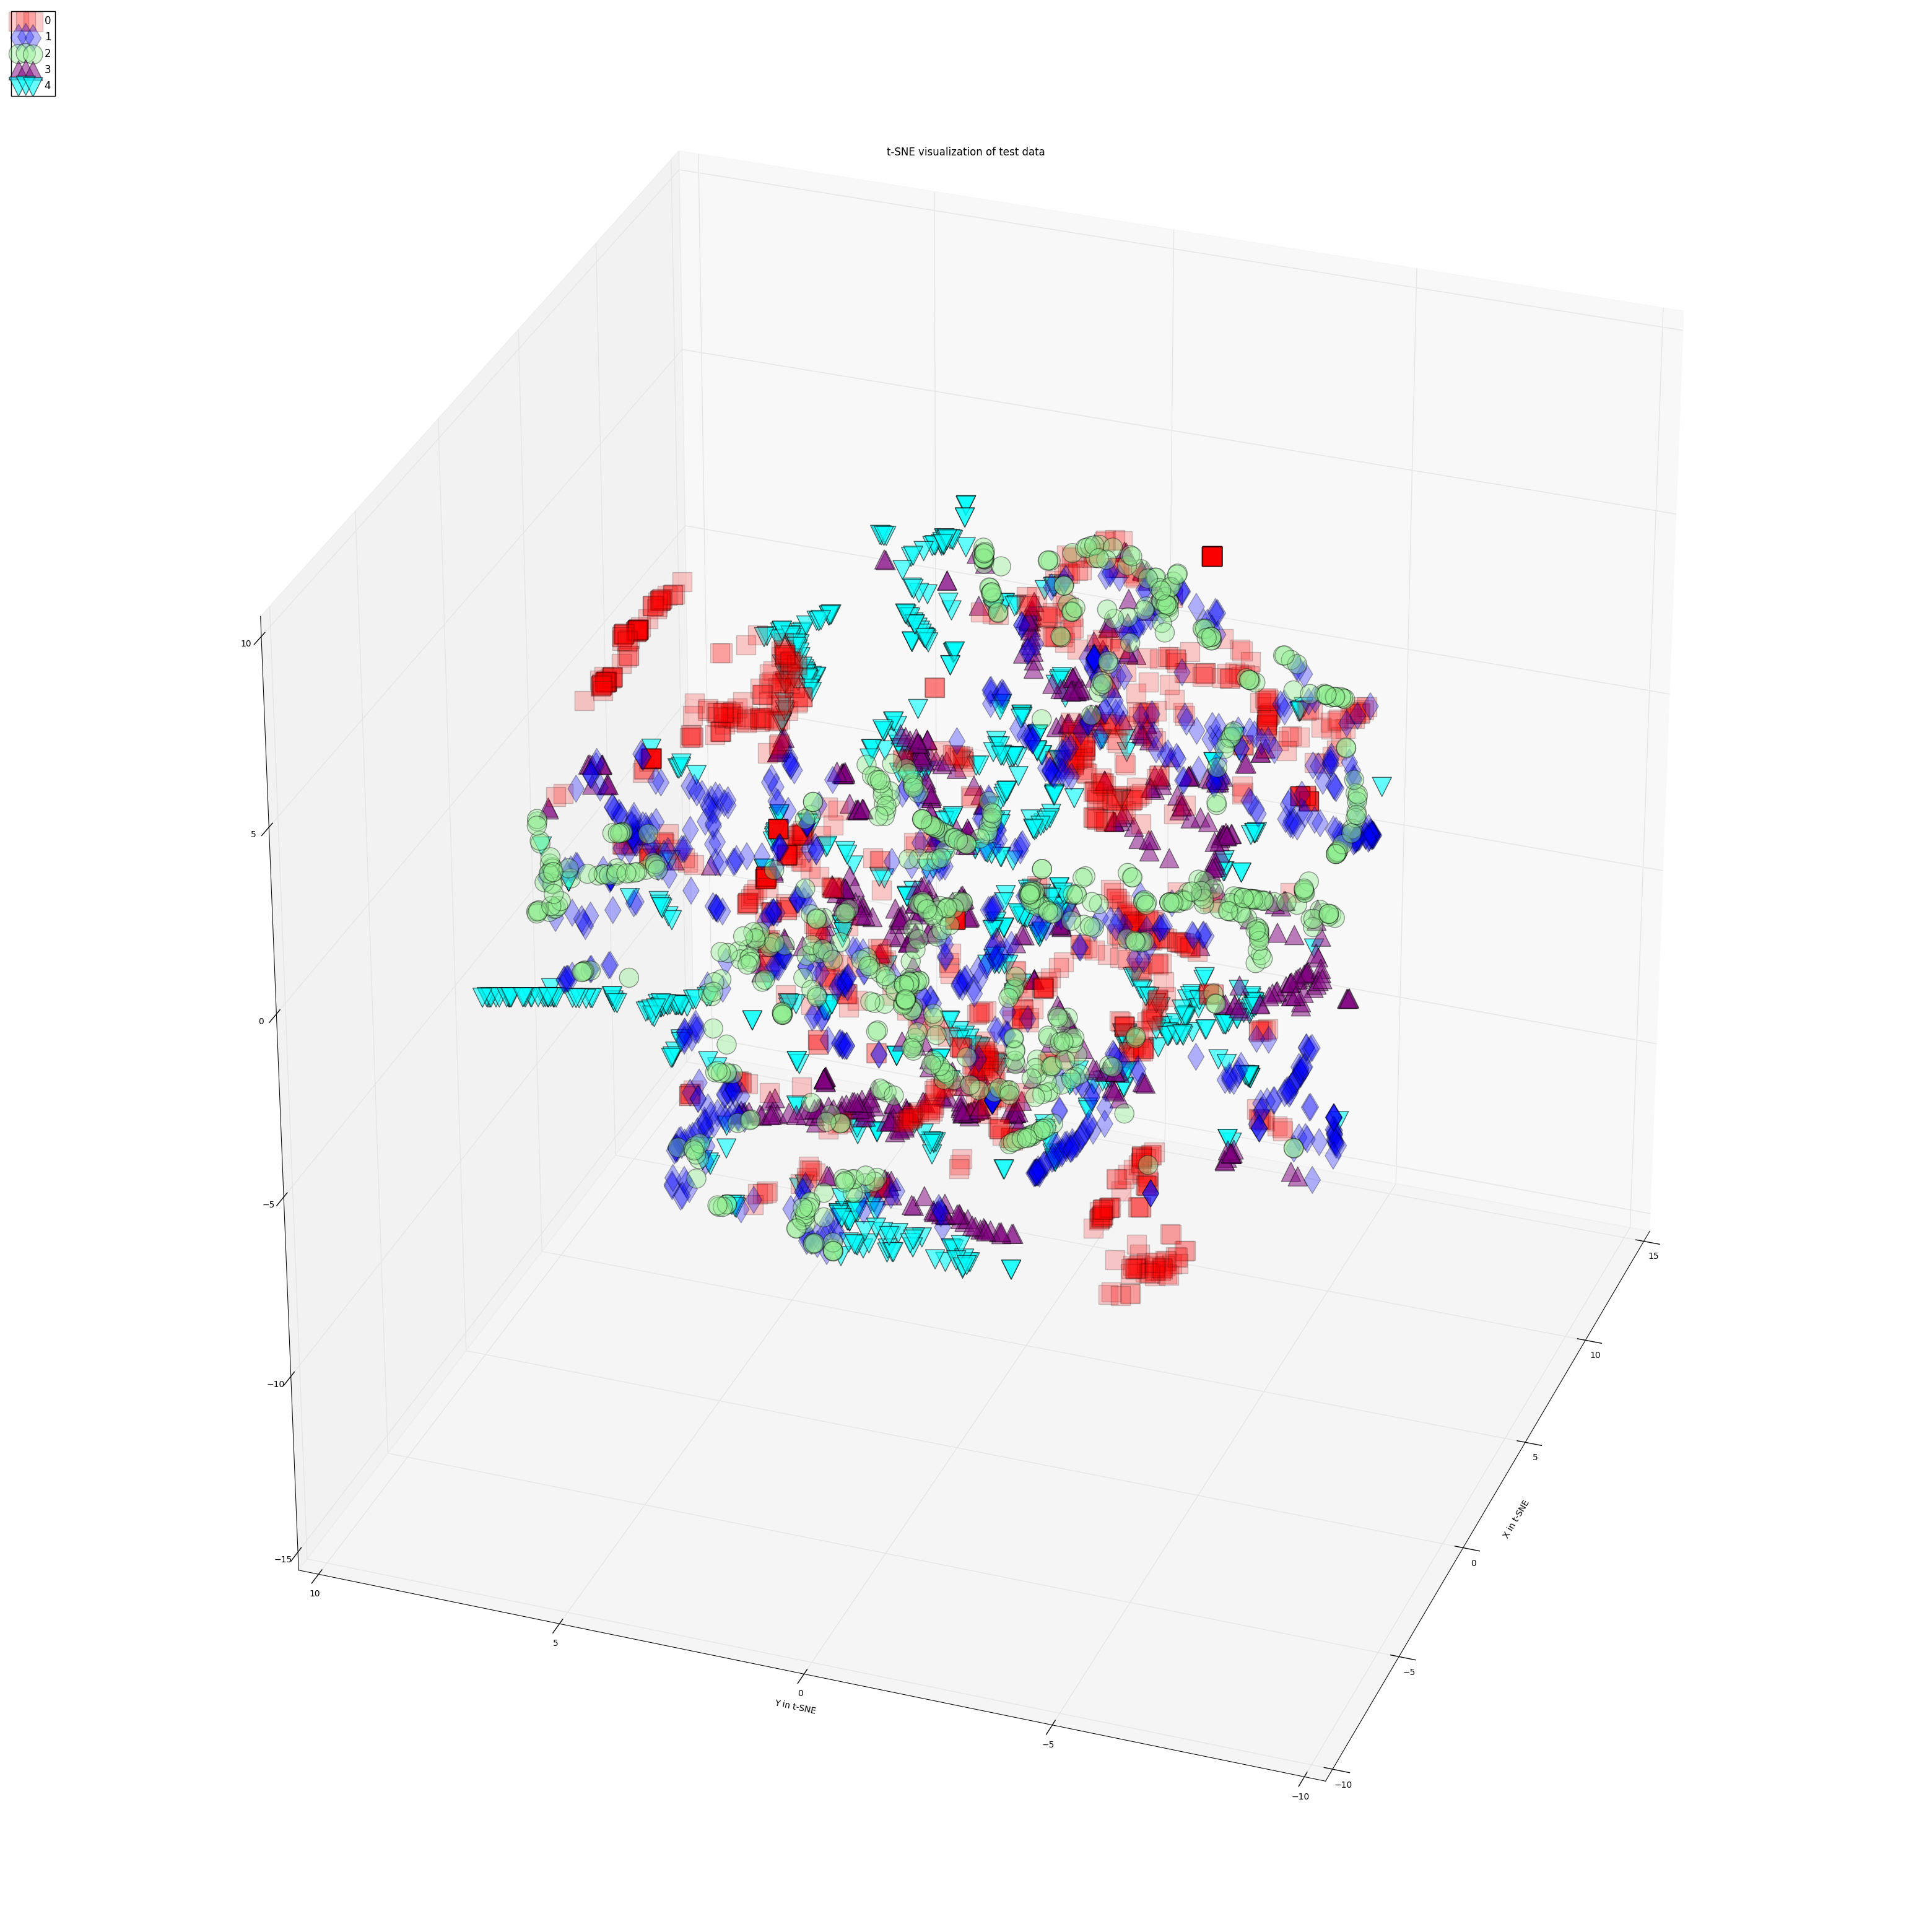

In [123]:
markers=('s', 'd', 'o', '^', 'v')
color_map = {0:'red', 1:'blue', 2:'lightgreen', 3:'purple', 4:'cyan'}
fig = plt.figure(figsize=(40,40))
ax = fig.add_subplot(111, projection='3d')
for idx, cl in enumerate(np.unique(y_test)):
     ax.scatter(x_test_3d[y_test==cl,0],x_test_3d[y_test==cl,1],x_test_3d[y_test==cl,2], c=color_map[idx], marker=markers[idx], label=cl, alpha=(idx+2)/10.0, s=500)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper left')
plt.title('t-SNE visualization of test data')
ax.azim = 200
ax.elev = 30
plt.show()